# Linear Neural Networks for Linear Regression

In [216]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1.0 Toy Problem

### Data

In [217]:
x  = torch.tensor([[1.0], [2.0], [3.0]])
x.shape

torch.Size([3, 1])

In [218]:
y = torch.tensor([[2.0], [4.0], [6.0]])

In [219]:
y

tensor([[2.],
        [4.],
        [6.]])

### Model Definition

In [220]:
linear_layer = nn.Linear(in_features=1, out_features= 1)

In [221]:
# Forward pass of input_tensor (x) via the single linear layer
y_0 = linear_layer(x)
y_0

tensor([[0.9341],
        [1.7901],
        [2.6460]], grad_fn=<AddmmBackward0>)

y = w^T * x + b

In [222]:
linear_layer.weight.item()

0.855933427810669

In [223]:
linear_layer.bias.item()

0.07821106910705566

In [224]:
y_test = linear_layer.weight.item() * 1.0 + linear_layer.bias.item()
print(y_test)

0.9341444969177246


### Loss Function

In [225]:
criterion = nn.MSELoss()

### Optimization Algorithm

In [226]:
# Stochastic Gradient Descent (SGD)
learning_rate = 0.01 # 1e-2
optimizer = torch.optim.SGD(linear_layer.parameters(), lr = learning_rate)

### Training

In [227]:
num_epochs = 1000
losses = []


for epoch in range(num_epochs):

  # forward pass
  y_pred = linear_layer(x)

  # compute loss
  loss = criterion(y_pred, y)

  # backward pass
  loss.backward()

  # update the weights (and biases)
  optimizer.step()
  optimizer.zero_grad()


  # Print the loss every 100 epochs
  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss:{loss.item():.4f}")

  losses.append(loss.item())

# Print the learned parameters
print(f'Learned parameters: w = {linear_layer.weight.item():.3f}, b = {linear_layer.bias.item():.3f}')

Epoch [100/1000], Loss:0.0211
Epoch [200/1000], Loss:0.0131
Epoch [300/1000], Loss:0.0081
Epoch [400/1000], Loss:0.0050
Epoch [500/1000], Loss:0.0031
Epoch [600/1000], Loss:0.0019
Epoch [700/1000], Loss:0.0012
Epoch [800/1000], Loss:0.0007
Epoch [900/1000], Loss:0.0004
Epoch [1000/1000], Loss:0.0003
Learned parameters: w = 1.981, b = 0.044


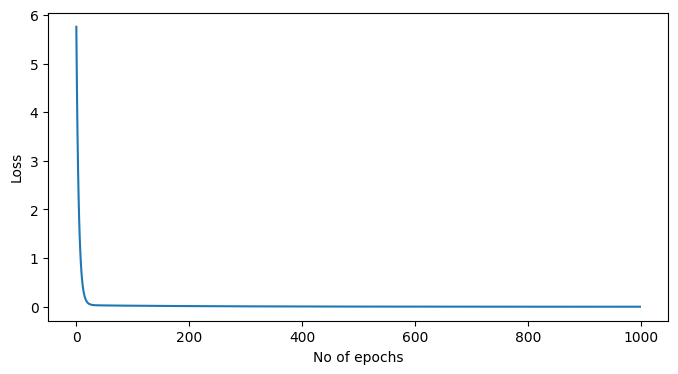

In [228]:
plt.figure(figsize= (8, 4))
plt.plot(range(len(losses)), losses)
plt.ylabel('Loss')
plt.xlabel('No of epochs')
plt.show()

### Inference

In [229]:
predicted = linear_layer(x).detach().numpy()
print(f'Predicted values: {predicted.flatten()}')

Predicted values: [2.024587  4.005276  5.9859657]


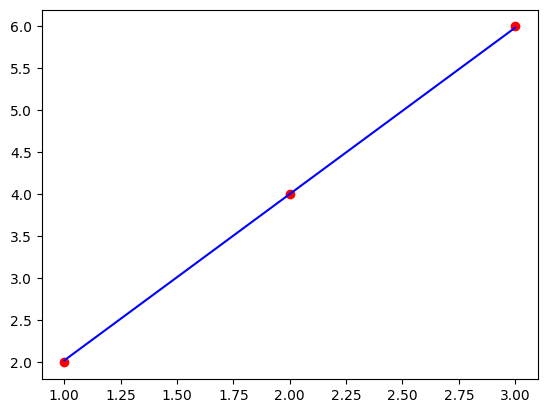

In [230]:
plt.plot(x, y , 'ro') # groundtruth
plt.plot(x, predicted, 'b')
plt.show()

## 2.0 Univariate Regression: House Price Prediction

### Data

In [231]:
data_1 = pd.read_csv('uni_housing.csv')

In [232]:
data_1.head()

,price,size
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


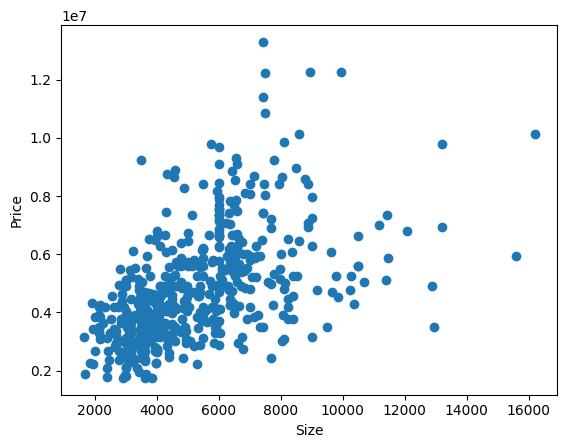

In [233]:
# Data Visualization
plt.figure()


plt.scatter(data_1['size'], data_1['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [234]:
# Split the data

X_series = data_1['size']
X_numpy = X_series.to_numpy()
X = torch.from_numpy(X_numpy.astype(np.float32))
X = X.view(X.shape[0], 1)

y_series = data_1['price']
y_numpy = y_series.to_numpy()
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)


In [235]:
# Determine input and output dimensions
n_samples, n_features = X.shape
input_size = n_features
output_size = 1

In [236]:
# Define model
model = nn.Linear(in_features = n_features, out_features = output_size)

In [237]:
# loss function
criterion = nn.MSELoss()

In [238]:
# optimization algorithm
learning_rate = 0.01 # 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

### Train the model

In [239]:
num_epochs = 1000

for epoch in range(num_epochs):
  # forward pass
  y_pred = model(X)

  # loss
  loss = criterion(y_pred, y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()
  optimizer.zero_grad()

  # Print loss every 100 epochs
  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], loss: {loss.item():.4f}")


# Print the learned parameters
print(f'Learned parameters: w = {model.weight.item():.3f}, b = {model.bias.item():.3f}')

Epoch [100/1000], loss: nan
Epoch [200/1000], loss: nan
Epoch [300/1000], loss: nan
Epoch [400/1000], loss: nan
Epoch [500/1000], loss: nan
Epoch [600/1000], loss: nan
Epoch [700/1000], loss: nan
Epoch [800/1000], loss: nan
Epoch [900/1000], loss: nan
Epoch [1000/1000], loss: nan
Learned parameters: w = nan, b = nan


### Improving the neural network

#### Normalize data

In [240]:
X_normalized = (X_series - X_series.mean())/(X_series.max() - X_series.min())

In [241]:
X_normalized.values.shape

(545,)

In [242]:
X_normalized_tensor = torch.tensor(X_normalized.values, dtype = torch.float)
X_normalized_tensor = X_normalized_tensor.view(X_normalized_tensor.shape[0], 1)
X_normalized_tensor.shape

torch.Size([545, 1])

In [243]:
factor = 1e6
y_normalized = y_series/factor # be careful!
y_normalized_tensor = torch.tensor(y_normalized.values, dtype = torch.float)
y_normalized_tensor = y_normalized_tensor.view(y_normalized_tensor.shape[0], 1)

Let's try again

In [244]:
# Define the model

model2 = nn.Linear(in_features = n_features, out_features = output_size)

In [245]:
# loss function
criterion = nn.MSELoss()

In [246]:
# include the momentum and learning rate in SGD
# optimization algorithm
learning_rate = 1e-2 # 1e-2 to 1e-4
beta = 0.95         # 0.85 to 0.99
optimizer = torch.optim.SGD(model2.parameters(), lr = learning_rate,
                            momentum = beta)

### Let's train again

In [247]:
num_epochs = 1000

for epoch in range(num_epochs):
  # forward pass
  y_pred = model2(X_normalized_tensor)

  # loss
  loss = criterion(y_pred, y_normalized_tensor)

  # backward pass
  loss.backward()

  # update
  optimizer.step()
  optimizer.zero_grad()

  # Print loss every 100 epochs
  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], loss: {loss.item():.4f}")


# Print the learned parameters
print(f'Learned parameters: w = {model2.weight.item():.3f}, b = {model2.bias.item():.3f}')

Epoch [100/1000], loss: 2.6708
Epoch [200/1000], loss: 2.5076
Epoch [300/1000], loss: 2.4907
Epoch [400/1000], loss: 2.4890
Epoch [500/1000], loss: 2.4889
Epoch [600/1000], loss: 2.4889
Epoch [700/1000], loss: 2.4889
Epoch [800/1000], loss: 2.4889
Epoch [900/1000], loss: 2.4889
Epoch [1000/1000], loss: 2.4889
Learned parameters: w = 6.722, b = 4.767


In [248]:
predicted = model2(X_normalized_tensor).detach().numpy()

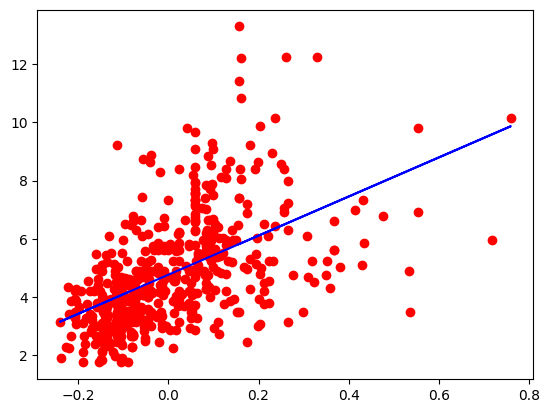

In [249]:
plt.plot(X_normalized_tensor, y_normalized_tensor, 'ro')
plt.plot(X_normalized_tensor, predicted, '-b')
plt.show()

#### Change the optimizer

In [250]:

model3 = nn.Linear(in_features = n_features, out_features = output_size)

In [251]:
learning_rate = 1e-2
optimizer = torch.optim.Adam(model3.parameters(), lr = learning_rate)

In [252]:
criterion = nn.MSELoss()

In [253]:
num_epochs = 1000

for epoch in range(num_epochs):
  # forward pass
  y_pred = model3(X_normalized_tensor)

  # loss
  loss = criterion(y_pred, y_normalized_tensor)

  # backward pass
  loss.backward()

  # update
  optimizer.step()
  optimizer.zero_grad()

  # Print loss every 100 epochs
  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], loss: {loss.item():.4f}")


# Print the learned parameters
print(f'Learned parameters: w = {model3.weight.item():.3f}, b = {model3.bias.item():.3f}')

Epoch [100/1000], loss: 18.2136
Epoch [200/1000], loss: 12.1240
Epoch [300/1000], loss: 8.0713
Epoch [400/1000], loss: 5.5308
Epoch [500/1000], loss: 4.0421
Epoch [600/1000], loss: 3.2312
Epoch [700/1000], loss: 2.8219
Epoch [800/1000], loss: 2.6303
Epoch [900/1000], loss: 2.5465
Epoch [1000/1000], loss: 2.5119
Learned parameters: w = 6.001, b = 4.661


#### Initialize weights - He / Kaiming initialization

In [254]:

model4 = nn.Linear(in_features = n_features, out_features = output_size)

In [255]:
learning_rate = 1e-2
optimizer = torch.optim.Adam(model4.parameters(), lr = learning_rate)

In [256]:
# initialize weights

nn.init.kaiming_normal_(model4.weight) # there is also nn.init.kaiming_uniform_(...)

Parameter containing:
tensor([[-2.1997]], requires_grad=True)

In [257]:
num_epochs = 1000

for epoch in range(num_epochs):
  # forward pass
  y_pred = model4(X_normalized_tensor)

  # loss
  loss = criterion(y_pred, y_normalized_tensor)

  # backward pass
  loss.backward()

  # update
  optimizer.step()
  optimizer.zero_grad()

  # Print loss every 100 epochs
  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], loss: {loss.item():.4f}")


# Print the learned parameters
print(f'Learned parameters: w = {model4.weight.item():.3f}, b = {model4.bias.item():.3f}')

Epoch [100/1000], loss: 12.8354
Epoch [200/1000], loss: 8.3108
Epoch [300/1000], loss: 5.6041
Epoch [400/1000], loss: 4.1085
Epoch [500/1000], loss: 3.3398
Epoch [600/1000], loss: 2.9612
Epoch [700/1000], loss: 2.7718
Epoch [800/1000], loss: 2.6687
Epoch [900/1000], loss: 2.6061
Epoch [1000/1000], loss: 2.5650
Learned parameters: w = 4.880, b = 4.746


## 3.0 Multivariate Regression: House Price Prediction

In [258]:
# Load 'housing_3.csv'
data_2 = pd.read_csv('housing_3.csv')
data_2.head()

,price,size,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [259]:
# Define input features
features = data_2.iloc[:, 1:]
X = features.to_numpy()
print(X)

[[7420    4    2]
 [8960    4    4]
 [9960    3    2]
 ...
 [3620    2    1]
 [2910    3    1]
 [3850    3    1]]


In [260]:
# Define the target
target = data_2.iloc[:, 0]
y = target.to_numpy()

In [261]:
input_size = X.shape[1]
output_size = 1

#### Convert Pandas dataframe to PyTorch dataset

In [262]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# instantiate dataset class
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())

In [263]:
# Let's take a sample
sample = dataset[0]
input_sample, output_sample = sample # a tuple
print('input sample:', input_sample)
print('output sample:', output_sample)

input sample: tensor([7.4200e+03, 4.0000e+00, 2.0000e+00])
output sample: tensor(13300000.)


So far, we've been using all the samples. Now, we split the data into a train set and validation set

In [264]:
data_2.shape

(545, 4)

In [265]:
n_samples = data_2.shape[0]
n_samples

545

In [266]:
n_val = 100
train, val = random_split(dataset, [n_samples - n_val, n_val]) # i.e. random_split(dataset, [445, 100])

In [267]:
# set batch size (utilizing minibatch)
batch_size = 64 # number of samples we take from the dataset per iteration

In [268]:
# Use PyTorch DataLoader
train_loader = DataLoader(train, batch_size, shuffle = True) # shuffle to break symmetry in data
val_loader = DataLoader(val, batch_size*2)

len(train_loader), len(val_loader)

(7, 1)

#### Define model architecture

In [269]:
import torch.nn.functional as F

# We use a class to define the model (object-oriented programming)

class HousePricePredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
                            nn.Linear(input_size, 2),
                            nn.Linear(2, output_size)
                            )

    def forward(self, xb):
        out = self.net(xb)
        return out

    def training_step(self, batch):
        inputs, targets = batch
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return loss

    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return {'val_loss': loss.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))

model5 = HousePricePredictor()

#### Model Training

In [278]:
# optimizer
opt_fxn = torch.optim.Adam
learning_rate = 1e-2

In [279]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, learning_rate, model5, train_loader, val_loader, opt_fxn = opt_fxn):
  history = []
  optimizer = opt_fxn(model5.parameters(), lr = learning_rate)
  for epoch in range(epochs):
    # Training Phase
    for batch in train_loader:
      loss = model5.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Validation phase
    result = evaluate(model5, val_loader)
    model5.epoch_end(epoch, result)
    history.append(result)

  return history

In [280]:
result = evaluate(model5, val_loader)
result

<ipython-input-269-cfcce7ab7447>:26: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out, targets)    # Calculate loss


{'val_loss': 17546446110720.0}

In [281]:
history = fit(10, learning_rate , model5, train_loader, val_loader)

Epoch [0], val_loss: 17432234164224.0000
Epoch [1], val_loss: 17318074646528.0000
Epoch [2], val_loss: 17203238797312.0000
Epoch [3], val_loss: 17087957303296.0000
Epoch [4], val_loss: 16973432881152.0000
Epoch [5], val_loss: 16857574670336.0000
Epoch [6], val_loss: 16741739528192.0000
Epoch [7], val_loss: 16627449987072.0000
Epoch [8], val_loss: 16511781568512.0000
Epoch [9], val_loss: 16397574864896.0000


<ipython-input-269-cfcce7ab7447>:20: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out, targets)    # Calculate loss
<ipython-input-269-cfcce7ab7447>:20: UserWarning: Using a target size (torch.Size([61])) that is different to the input size (torch.Size([61, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out, targets)    # Calculate loss
<ipython-input-269-cfcce7ab7447>:26: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out, targets)    # Calculate loss


#### Inference

In [282]:
def predict_single(x, model):
  xb = x.unsqueeze(0)
  return model(x).item()

In [283]:
x, target = val[0]
prediction = predict_single(x, model5)
print('Input: ', x)
print('Target: ', target.item())
print('Prediction: ', prediction)

Input:  tensor([7.4400e+03, 3.0000e+00, 2.0000e+00])
Target:  7420000.0
Prediction:  1920439.75


# Homework: Improve the multivariate regression

- Improve the multivariate regression using ideas from univariate regression (e.g. normalize your data)
- Initialize your weights
- Play around with your learning rate for the optimizer
- Afterwards, **build a neural network** to predict the ride duration (target) for the data below for New York yellow taxi trips in January 2024. Please, use pick-up location ID (`PULocationID`) and drop-off location ID (`DOLocationID`) as your features. The following resources might help:

  *   https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf
  *   https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
  * https://www.youtube.com/watch?v=iRunifGSHFc&list=PL3MmuxUbc_hIUISrluw_A7wDSmfOhErJK
  * https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/01-intro/duration-prediction.ipynb



In [274]:
data_taxi = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
data_taxi.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.5,0.5,6.90,0.0,1.0,41.50,2.5,0.00
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.00,0.0,1.0,64.95,0.0,1.75
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.5,0.5,0.00,0.0,1.0,30.40,2.5,0.00
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.00,0.0,1.0,36.00,2.5,0.00
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,N,113,113,2,3.0,1.0,0.5,0.00,0.0,1.0,8.00,2.5,0.00


In [275]:
data_taxi['duration'] = data_taxi['tpep_dropoff_datetime'] - data_taxi['tpep_pickup_datetime']
data_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 20 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int32          
 1   tpep_pickup_datetime   datetime64[us] 
 2   tpep_dropoff_datetime  datetime64[us] 
 3   passenger_count        float64        
 4   trip_distance          float64        
 5   RatecodeID             float64        
 6   store_and_fwd_flag     object         
 7   PULocationID           int32          
 8   DOLocationID           int32          
 9   payment_type           int64          
 10  fare_amount            float64        
 11  extra                  float64        
 12  mta_tax                float64        
 13  tip_amount             float64        
 14  tolls_amount           float64        
 15  improvement_surcharge  float64        
 16  total_amount           float64        
 17  congestion_surcharge   float64        
 18  Ai